In [1]:

extract_path = "/home/DSE423/Documents/FL Project/Data"


In [4]:
import os

# Path to your extracted data
base_dir = "/home/DSE423/Documents/FL Project/Data"

# Define valid image extensions (to ignore stray files)
valid_exts = ('.jpg', '.jpeg', '.png', '.nii', '.gz')

# Count images in each subfolder
for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        count = sum(
            1 for file in os.listdir(folder_path)
            if file.lower().endswith(valid_exts)
        )
        print(f"{folder}: {count} images")


Mild Dementia: 5002 images
Moderate Dementia: 488 images
Non Demented: 67222 images
Very mild Dementia: 13725 images


In [5]:
import os
import pandas as pd

# Path to your dataset
# Updated to your local Mac path
base_dir = "/home/DSE423/Documents/FL Project/Data"

# Supported image extensions
valid_exts = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')

data_records = []

# Walk through folders
print(f"Searching for images in: {base_dir}")
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(valid_exts):
            label = os.path.basename(root)  # Folder name = label
            file_path = os.path.join(root, file)
            data_records.append((file_path, label))

print(f"Found {len(data_records)} images.")

# Create a DataFrame
df = pd.DataFrame(data_records, columns=["image_path", "label"])

# After creating df (DataFrame of all images)
df_small = (
    df.groupby("label", group_keys=False)
      .apply(lambda x: x.sample(frac=0.1, random_state=42))  # take 10% from each class
      .reset_index(drop=True)
)




# Save CSV to local folder
# Updated to your local Mac path
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"
df.to_csv(manifest_path, index=False)

print("✅ Manifest created successfully!")
print(f"📸 Total images found: {len(df)}")
print(f"💾 Saved to: {manifest_path}")
print("\nSample rows:")
print(df.head())

Searching for images in: /home/DSE423/Documents/FL Project/Data
Found 86437 images.
✅ Manifest created successfully!
📸 Total images found: 86437
💾 Saved to: /home/DSE423/Documents/FL Project/manifest.csv

Sample rows:
                                          image_path              label
0  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
1  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
2  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
3  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
4  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia


/tmp/ipykernel_96448/1477990416.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.1, random_state=42))  # take 10% from each class


✅ Total images: 86437

📊 Images per class:
label
Non Demented          67222
Very mild Dementia    13725
Mild Dementia          5002
Moderate Dementia       488
Name: count, dtype: int64


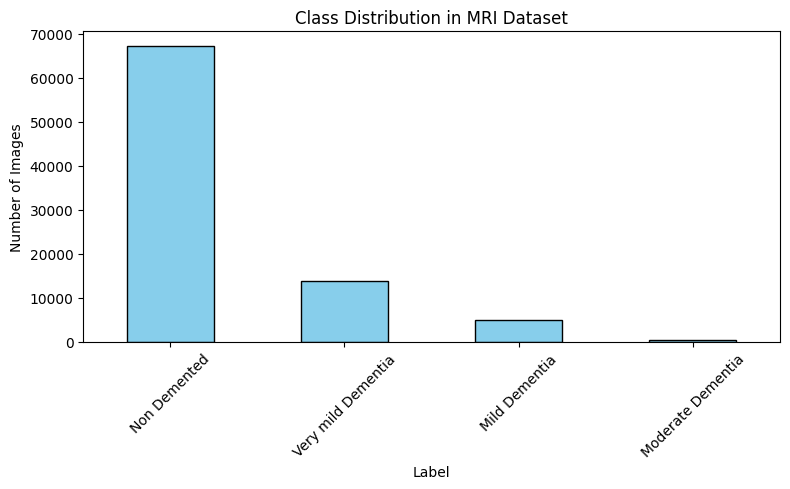

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the manifest
# Updated to your local Mac path
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"

df = pd.read_csv(manifest_path)

# Check total images
print(f"✅ Total images: {len(df)}\n")

# Check number of images per class
print("📊 Images per class:")
print(df['label'].value_counts())

# Plot class distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution in MRI Dataset")
plt.xlabel("Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import KFold  # <-- CHANGED: Import KFold
import os

# Path to your manifest file (using the 10% subset)
# Make sure this points to 'manifest_small.csv' to keep the workload light
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"

# Read the manifest
df = pd.read_csv(manifest_path)

# Number of clients
num_clients = 10

# Output directory for client splits
output_dir = "/home/DSE423/Documents/FL Project/client_splits"
os.makedirs(output_dir, exist_ok=True)

# Create random folds using KFold
# <-- CHANGED: Replaced StratifiedKFold with KFold
kf = KFold(n_splits=num_clients, shuffle=True, random_state=42)

# <-- CHANGED: The loop no longer needs df['label']
for i, (_, test_idx) in enumerate(kf.split(df)):
    client_df = df.iloc[test_idx]
    client_path = os.path.join(output_dir, f"client_{i+1}.csv")
    client_df.to_csv(client_path, index=False)
    print(f"✅ Saved: {client_path} | Samples: {len(client_df)}")

print("\n🎉 Data successfully split into 10 RANDOM clients!")

✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_1.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_2.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_3.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_4.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_5.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_6.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_7.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_8.csv | Samples: 8643
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_9.csv | Samples: 8643
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_10.csv | Samples: 8643

🎉 Data successfully split into 10 RANDOM clients!


In [8]:
import pandas as pd
import os

# Updated to your local Mac path
split_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Go through each client CSV and print class distribution
for file in sorted(os.listdir(split_dir)):
    if file.endswith(".csv"):
        client_df = pd.read_csv(os.path.join(split_dir, file))
        print(f"\n📁 {file}")
        print(client_df['label'].value_counts())


📁 client_1.csv
label
Non Demented          6747
Very mild Dementia    1365
Mild Dementia          487
Moderate Dementia       45
Name: count, dtype: int64

📁 client_10.csv
label
Non Demented          6686
Very mild Dementia    1422
Mild Dementia          482
Moderate Dementia       53
Name: count, dtype: int64

📁 client_2.csv
label
Non Demented          6756
Very mild Dementia    1315
Mild Dementia          516
Moderate Dementia       57
Name: count, dtype: int64

📁 client_3.csv
label
Non Demented          6706
Very mild Dementia    1377
Mild Dementia          520
Moderate Dementia       41
Name: count, dtype: int64

📁 client_4.csv
label
Non Demented          6766
Very mild Dementia    1324
Mild Dementia          504
Moderate Dementia       50
Name: count, dtype: int64

📁 client_5.csv
label
Non Demented          6781
Very mild Dementia    1348
Mild Dementia          460
Moderate Dementia       55
Name: count, dtype: int64

📁 client_6.csv
label
Non Demented          6715
Very mild Deme

In [9]:
# =========================================================================
# ===== 1. MODIFICATION: Define separate Train and Val transforms =====
# =========================================================================

# --- Transform for TRAINING data (with augmentation) ---
train_transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        # --- ADDED AUGMENTATIONS ---
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        # ---------------------------
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3),
    ]
)

# --- Transform for VALIDATION/TEST data (NO augmentation) ---
val_transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3),
    ]
)

# =========================================================================

In [ ]:
# Step 3: Define custom dataset for each client
from torch.utils.data import Dataset
class MRIDataset(Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

        # Create a label mapping so each class becomes a number
        self.label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label_name = self.data.iloc[idx, 1]
        label = self.label_map[label_name]

        # Open image in grayscale mode
        image = Image.open(img_path).convert("L")

        # Apply transform (resize, normalize, etc.)
        if self.transform:
            image = self.transform(image)

        return image, label


(raylet) [2025-11-18 10:25:29,524 E 96745 96775] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_09-13-25_653413_96448 is over 95% full, available space: 7267794944; capacity: 746669416448. Object creation will fail if spilling is required.


In [13]:
# Step 4: Create DataLoaders for all clients

import glob

# Path where client CSVs are stored
# Updated to your local Mac path
client_csv_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Load all CSVs
client_csvs = sorted(glob.glob(client_csv_dir + "/*.csv"))

client_loaders = {}
batch_size = 32  # you can adjust based on your GPU/CPU

for i, csv_path in enumerate(client_csvs, start=1):
    dataset = MRIDataset(csv_path, transform=common_transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    client_loaders[f"client_{i}"] = loader
    print(f"✅ Loaded client_{i} | Samples: {len(dataset)}")

print("\nAll client DataLoaders are ready and preprocessed consistently! 🚀")

NameError: name 'common_transform' is not defined

(raylet) [2025-11-18 10:25:39,527 E 96745 96775] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_09-13-25_653413_96448 is over 95% full, available space: 7267598336; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-18 10:25:49,531 E 96745 96775] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_09-13-25_653413_96448 is over 95% full, available space: 7267598336; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-18 10:25:59,534 E 96745 96775] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_09-13-25_653413_96448 is over 95% full, available space: 7267598336; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-18 10:26:09,537 E 96745 96775] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_09-13-25_653413_96448 is over 95% full, available space: 7267594240; capacity: 746669416448. Object creation wil

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Base directory where your client CSVs are stored
# FIXED: Added the leading '/' to make it an absolute path
base_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Create new folder for split files
split_dir = os.path.join(base_dir, "splits")
os.makedirs(split_dir, exist_ok=True)

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Loop over all 10 clients
for client_id in range(1, 11):
    client_path = os.path.join(base_dir, f"client_{client_id}.csv")
    df = pd.read_csv(client_path)

    # First split: Train vs temp (val+test)
    train_df, temp_df = train_test_split(
        df,
        test_size=(1 - train_ratio),
        stratify=df["label"],
        random_state=4_2
    )

    # Second split: Validation vs Test
    try:
        # Attempt stratified split
        val_df, test_df = train_test_split(
            temp_df,
            test_size=(test_ratio / (test_ratio + val_ratio)),
            stratify=temp_df["label"],
            random_state=42
        )
        print(f"✅ Client {client_id}: Stratified split successful.")
    except ValueError as e:
        # Fallback to non-stratified split if stratification fails
        print(f"⚠️ Client {client_id}: Stratified split failed due to small class size ({e}). Falling back to non-stratified split for val/test.")
        val_df, test_df = train_test_split(
            temp_df,
            test_size=(test_ratio / (test_ratio + val_ratio)),
            random_state=42
        )


    # Save all three splits
    train_path = os.path.join(split_dir, f"client_{client_id}_train.csv")
    val_path = os.path.join(split_dir, f"client_{client_id}_val.csv")
    test_path = os.path.join(split_dir, f"client_{client_id}_test.csv")

    train_df.to_csv(train_path, index=False)
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"📊 Client {client_id} Split Sizes: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")
    print(f"📁 Saved to: {split_dir}")


print("\n🎉 All clients successfully split into train/val/test sets!")

✅ Client 1: Stratified split successful.
📊 Client 1 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 2: Stratified split successful.
📊 Client 2 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 3: Stratified split successful.
📊 Client 3 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 4: Stratified split successful.
📊 Client 4 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 5: Stratified split successful.
📊 Client 5 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 6: Stratified split successful.
📊 Client 6 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 7: Stra

In [2]:
!rm -rf /tmp/ray/*

In [ ]:
# ===== Imports =====
import os
import flwr as fl
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import pandas as pd
import numpy as np
from PIL import Image
from typing import List, Tuple, Dict

from flwr.server.client_manager import SimpleClientManager
from flwr.server.server import Server
from flwr.common import parameters_to_ndarrays

# ===== Device setup (GPU or CPU) =====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧠 Using device: {device}")

# ===== CNN Model =====
class MRI_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(MRI_CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.MaxPool2d(2),
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
        )
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

# ===== Dataset Class =====
class MRIDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image = Image.open(str(img_path)).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3,
        }
        return image, label_map[label]

# ===== Transform =====
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
])

# ===== Federated Client (FedProx + Class Weights) =====
class MRIClient(fl.client.NumPyClient):
    def __init__(self, train_loader, val_loader, model):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model.to(device)
        
        # --- 1. Calculate Class Weights for Imbalance ---
        df = train_loader.dataset.data
        label_map = {
            "Non Demented": 0, 
            "Very mild Dementia": 1, 
            "Mild Dementia": 2, 
            "Moderate Dementia": 3
        }
        # Get all labels for this client
        y_train = df.iloc[:, 1].map(label_map).values
        
        # Count samples per class
        class_counts = np.bincount(y_train, minlength=4)
        total_samples = len(y_train)
        num_classes = 4
        weights = []
        
        # Calculate inverse frequency weights
        for count in class_counts:
            if count > 0:
                w = total_samples / (num_classes * count)
                weights.append(w)
            else:
                weights.append(1.0) # Default if class missing
                
        class_weights = torch.FloatTensor(weights).to(device)
        
        # --- 2. Initialize Loss with Weights ---
        self.criterion = nn.CrossEntropyLoss(weight=class_weights)
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.001, momentum=0.9)

    def get_parameters(self, config=None):
        return [val.cpu().numpy() for _, val in self.model.state_dict().items()]

    def set_parameters(self, parameters):
        keys = list(self.model.state_dict().keys())
        new_state_dict = {k: torch.tensor(v, device=device) for k, v in zip(keys, parameters)}
        self.model.load_state_dict(new_state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        
        # --- 3. FedProx Logic: Save Global State ---
        global_params = [p.clone().detach() for p in self.model.parameters()]
        proximal_mu = float(config["proximal_mu"])
        
        self.model.train()
        for epoch in range(3):
            for imgs, labels in tqdm(self.train_loader, leave=False):
                imgs, labels = imgs.to(device), labels.to(device)
                self.optimizer.zero_grad()
                
                outputs = self.model(imgs)
                
                # Weighted Cross Entropy Loss
                loss = self.criterion(outputs, labels)
                
                # --- 4. Add Proximal Term ---
                proximal_term = 0.0
                for local_weights, global_weights in zip(self.model.parameters(), global_params):
                    proximal_term += (local_weights - global_weights).norm(2)**2
                
                loss += (proximal_mu / 2) * proximal_term
                
                loss.backward()
                self.optimizer.step()
                
        return self.get_parameters(), len(self.train_loader.dataset), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        self.model.eval()
        loss, correct = 0.0, 0
        # Use unweighted loss for reporting validation metrics
        val_criterion = nn.CrossEntropyLoss() 
        
        with torch.no_grad():
            for imgs, labels in self.val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = self.model(imgs)
                loss += val_criterion(outputs, labels).item()
                correct += (outputs.argmax(1) == labels).sum().item()
        accuracy = correct / len(self.val_loader.dataset)
        return float(loss), len(self.val_loader.dataset), {"accuracy": float(accuracy)}

# ===== Create client_fn (Original format maintained) =====
def client_fn(cid: str):
    client_id = int(cid) + 1
    base_path = "/home/DSE423/Documents/FL Project/client_splits/splits"
    train_csv = f"{base_path}/client_{client_id}_train.csv"
    val_csv = f"{base_path}/client_{client_id}_val.csv"

    train_dataset = MRIDataset(train_csv, transform)
    val_dataset = MRIDataset(val_csv, transform)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = MRI_CNN()
    return MRIClient(train_loader, val_loader, model)

# ===== Weighted metrics =====
def weighted_average(metrics: List[Tuple[int, Dict[str, float]]]) -> Dict[str, float]:
    total_examples = sum([num_examples for num_examples, _ in metrics])
    weighted_acc = sum([num_examples * m["accuracy"] for num_examples, m in metrics])
    return {"accuracy": weighted_acc / total_examples}

# ===== Federated Strategy (FedProx) =====
strategy = fl.server.strategy.FedProx(
    proximal_mu=0.1,
    fraction_fit=1.0,
    fraction_evaluate=1.0,
    min_fit_clients=10,
    min_evaluate_clients=10,
    min_available_clients=10,
    evaluate_metrics_aggregation_fn=weighted_average,
)

# ===== Server Setup =====
client_manager = SimpleClientManager()
server = Server(client_manager=client_manager, strategy=strategy)
print("✅ Server initialized for 10 clients (FedProx + Weighted).")

# ===== Run Simulation =====
print("🚀 Starting Simulation...")

import ray
ray.shutdown()

num_gpus = torch.cuda.device_count()
client_resources = {"num_cpus": 2, "num_gpus": 1 if num_gpus > 0 else 0}

MANUAL_ROUNDS = 50

history = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=10,
    config=fl.server.ServerConfig(num_rounds=MANUAL_ROUNDS),
    client_resources=client_resources,
    server=server,
    client_manager=client_manager,
)

print(f"🏁 Simulation finished after {MANUAL_ROUNDS} rounds!")

# ===== Save Final Global Model =====
print("\n💾 Saving the final global model...")

final_parameters = server.parameters
final_parameters_ndarrays = parameters_to_ndarrays(final_parameters)

net = MRI_CNN().to(device)
keys = list(net.state_dict().keys())
new_state_dict = {k: torch.tensor(v, device=device) for k, v in zip(keys, final_parameters_ndarrays)}
net.load_state_dict(new_state_dict, strict=True)

save_path = "/home/DSE423/Documents/FL Project/fedprox_weighted_10client.pth"
torch.save(net.state_dict(), save_path)
print(f"🎉 Model successfully saved to: {save_path}")

# ===== Print Training History =====
print("\n--- Simulation History ---")
print("Loss (distributed):", history.losses_distributed)
print("Metrics (distributed, evaluate):", history.metrics_distributed)

🧠 Using device: cuda
✅ Server initialized for 10 clients (FedProx + Weighted).
🚀 Starting Simulation...


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=50, no round_timeout
2025-11-20 01:27:35,970	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'accelerator_type:G': 1.0, 'node:__internal_head__': 1.0, 'CPU': 24.0, 'memory': 16657543988.0, 'object_store_memory': 8328771993.0, 'node:172.28.141.130': 1.0, 'GPU': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 2, 'num_gpus': 1}
INFO :      F

🏁 Simulation finished after 50 rounds!

💾 Saving the final global model...
🎉 Model successfully saved to: /home/DSE423/Documents/FL Project/fedprox_weighted_10client.pth

--- Simulation History ---
Loss (distributed): [(1, 32.79807421898542), (2, 26.99316122019687), (3, 25.382876242458327), (4, 22.764353501548044), (5, 22.35337790029427), (6, 21.18602739649243), (7, 21.50111961520802), (8, 19.41790279136541), (9, 24.468820684443575), (10, 29.09397715570758), (11, 25.54059906967293), (12, 23.5170509036637), (13, 12.719617301546048), (14, 16.05861203275949), (15, 9.557487651863177), (16, 12.177235920148537), (17, 16.270750606370072), (18, 12.79249394071091), (19, 46.40283173753383), (20, 18.78695842149165), (21, 17.15403048211659), (22, 37.74920459945604), (23, 13.376968897023287), (24, 20.74329828031449), (25, 8.207425666271504), (26, 8.809151365217378), (27, 29.86852376797917), (28, 48.00946867829337), (29, 29.853237108718808), (30, 21.86473293827702), (31, 31.19041548665201), (32, 13.

(raylet) [2025-11-20 04:42:53,373 E 335688 335717] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-20_01-27-34_058244_333272 is over 95% full, available space: 7060144128; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-20 04:43:03,379 E 335688 335717] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-20_01-27-34_058244_333272 is over 95% full, available space: 7060119552; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-20 04:43:13,390 E 335688 335717] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-20_01-27-34_058244_333272 is over 95% full, available space: 7060119552; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-20 04:43:23,400 E 335688 335717] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-20_01-27-34_058244_333272 is over 95% full, available space: 7060119552; capacity: 746669416448. Object 

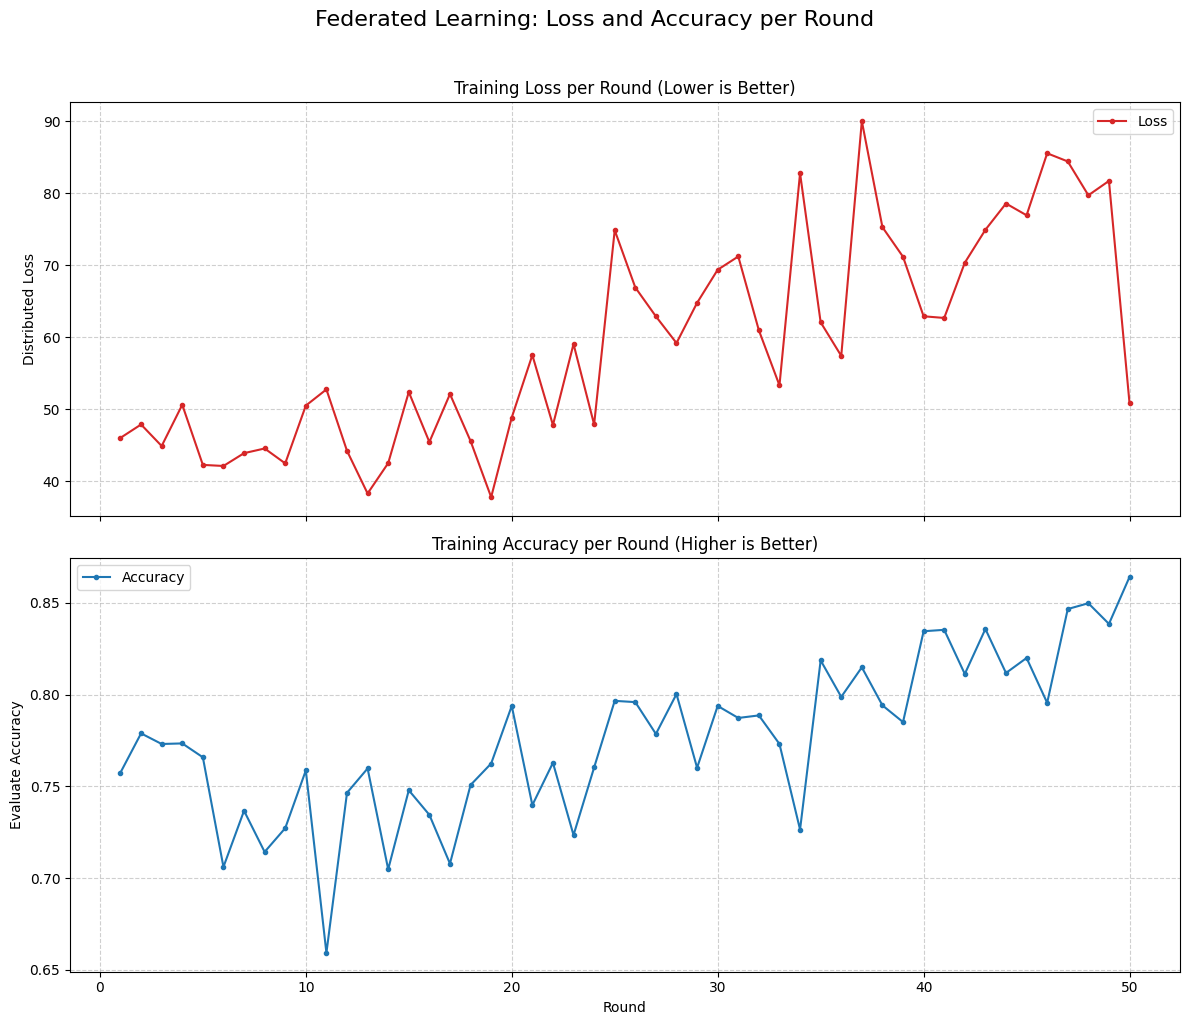

In [1]:
import matplotlib.pyplot as plt

# Data extracted from your log output (50 rounds)
rounds = list(range(1, 51))

# History (loss, distributed)
losses = [
    46.05707268203483, 47.91164287155748, 44.92410452134251, 50.6509919011865, 42.29960533059525,
    42.14944323211313, 43.92847892216832, 44.57896681309316, 42.509579747202785, 50.5328788207543,
    52.785021198705316, 44.25285093132368, 38.32738123401704, 42.5448655749322, 52.420894740419286,
    45.47734233800253, 52.138999053440905, 45.61161924938845, 37.82186149150303, 48.877818569614526,
    57.55286049599672, 47.83021229676362, 59.087137457843184, 47.916273705558446, 74.8944982920025,
    66.93935217554592, 62.927491688226496, 59.22339250337069, 64.8082481978338, 69.40690703840018,
    71.24812453053762, 60.994597544755294, 53.34481723095296, 82.81408618505361, 62.10910312376851,
    57.44356387208599, 90.04958643840044, 75.32129810213712, 71.20794413051335, 62.94191026846494,
    62.71085842588033, 70.38150028311726, 74.95588823743644, 78.60803378591926, 76.97264322220677,
    85.58311782902653, 84.45041245446005, 79.75055922964074, 81.74368559417489, 50.835194925402774
]

# History (metrics, distributed, evaluate) - 'accuracy'
accuracies = [
    0.757538366622966, 0.7789002853397085, 0.7731163723297602, 0.7734248476902907, 0.7658672013572916,
    0.7061001002544922, 0.736716279787152, 0.7142746973085525, 0.7272306624508368, 0.7586951492249556,
    0.6592118454538444, 0.7465103724839979, 0.7597748129868127, 0.7047890799722372, 0.7478985116063854,
    0.7344798334233054, 0.707873833577543, 0.7507519086912933, 0.7624739723914552, 0.7938613403254415,
    0.7398010333924577, 0.7628595665921185, 0.7234518392843372, 0.7603146448677411, 0.7966376185702168,
    0.7959435490090229, 0.7785918099791779, 0.8003393228965836, 0.7601604071874759, 0.7938613403254415,
    0.7873062389141667, 0.7886943780365543, 0.7731163723297602, 0.7264594740495103, 0.818693606848153,
    0.7987969460939307, 0.8149147836816534, 0.7941698156859721, 0.7850697925503201, 0.8345800879154778,
    0.8353512763168042, 0.8112901981954191, 0.8358139893576001, 0.8118300300763477, 0.820004627130408,
    0.7955579548083597, 0.8466877458163029, 0.8498496182617413, 0.8385902676023752, 0.8641937225264132
]

# Create a figure with two subplots, one on top of the other
# sharex=True will make them share the same x-axis (Rounds)
fig, (ax_loss, ax_acc) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)


# --- Plot 1: Loss ---
ax_loss.plot(rounds, losses, marker='.', color='tab:red', label='Loss')
ax_loss.set_ylabel('Distributed Loss')
ax_loss.set_title('Training Loss per Round (Lower is Better)')
ax_loss.grid(True, linestyle='--', alpha=0.6)
ax_loss.legend()

# --- Plot 2: Accuracy ---
ax_acc.plot(rounds, accuracies, marker='.', color='tab:blue', label='Accuracy')
ax_acc.set_xlabel('Round')
ax_acc.set_ylabel('Evaluate Accuracy')
ax_acc.set_title('Training Accuracy per Round (Higher is Better)')
ax_acc.grid(True, linestyle='--', alpha=0.6)
ax_acc.legend()

# Add a main title for the whole figure
fig.suptitle('Federated Learning: Loss and Accuracy per Round', fontsize=16, y=1.02)

# Improve layout
plt.tight_layout()

# Display the figure
plt.show()

In [5]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

# =========================================================================
# STEP 1: RE-DEFINE YOUR MODEL AND DATASET CLASSES
# (Must be identical to your training script)
# =========================================================================

# ===== Device setup (GPU or CPU) =====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧠 Using device: {device}")

# ===== CNN Model =====
class MRI_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(MRI_CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.MaxPool2d(2),
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
        )
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

# ===== Dataset Class =====
class MRIDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3,
        }
        return image, label_map[label]

# ===== Transform (must be the same as training) =====
transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3),
    ]
)

# =========================================================================
# STEP 2: LOAD THE SAVED MODEL
# =========================================================================
print("Loading saved global model...")
model_path = "/home/DSE423/Documents/FL Project/final_model_gpu_fedprox_weighted_aug.pth"
model = MRI_CNN(num_classes=4).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()  # <-- Set model to evaluation mode
print("✅ Model loaded successfully.")

# =========================================================================
# STEP 3: LOAD THE TEST DATA
# =========================================================================

# --- Path has been updated as requested ---
TEST_CSV_PATH = "/home/DSE423/Documents/FL Project/combined_global_test.csv"

try:
    test_dataset = MRIDataset(csv_path=TEST_CSV_PATH, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    print(f"✅ Test data loaded from: {TEST_CSV_PATH}")
except FileNotFoundError:
    print(f"Error: Test data CSV not found at {TEST_CSV_PATH}")
    print("Please check the file path and permissions.")
    exit()
except Exception as e:
    print(f"Error loading test data: {e}")
    exit()

# =========================================================================
# STEP 4: GET PREDICTIONS
# =========================================================================
print("Running inference on test data...")
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient calculation
    for images, labels in tqdm(test_loader, desc="Predicting"):
        images = images.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get the class with the highest score
        _, predicted_indices = torch.max(outputs, 1)
        
        # Store predictions and labels
        all_preds.extend(predicted_indices.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("✅ Inference complete.")

# =========================================================================
# STEP 5: COMPUTE AND PLOT CONFUSION MATRIX
# =========================================================================

# Define your class names in order (0, 1, 2, 3)
class_labels = [
    "Non Demented", 
    "Very mild", 
    "Mild", 
    "Moderate"
]

# Calculate the matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,      # Show the numbers in each cell
    fmt='d',         # Format as integer
    cmap='Blues',    # Color theme
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.title('Confusion Matrix - Final Global Model', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Save the plot
save_path = "confusion_matrix_fedprox.png"
plt.savefig(save_path)
print(f"✅ Confusion matrix saved to: {save_path}")

# ... (all the plotting code from the previous step) ...

# =========================================================================
# STEP 6: CALCULATE AND PRINT FINAL TEST ACCURACY
# =========================================================================
from sklearn.metrics import accuracy_score

# Calculate accuracy
test_accuracy = accuracy_score(all_labels, all_preds)

print("\n--- Final Model Performance ---")
print(f"Overall Test Accuracy: {test_accuracy * 100:.2f}%")

# You can also get a full classification report
from sklearn.metrics import classification_report
print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_labels))

# Show the plot
plt.show()

🧠 Using device: cuda
Loading saved global model...
✅ Model loaded successfully.
✅ Test data loaded from: /home/DSE423/Documents/FL Project/combined_global_test.csv
Running inference on test data...


Predicting:   1%|          | 3/406 [00:00<00:21, 18.84it/s]


KeyboardInterrupt: 

In [ ]:
# =========================================================================
# STEP 5: COMPUTE AND PLOT CONFUSION MATRIX
# =========================================================================
from sklearn.metrics import confusion_matrix

# Define your class names in order (0, 1, 2, 3)
class_labels = [
    "Non Demented", 
    "Very mild", 
    "Mild", 
    "Moderate"
]

# Calculate the matrix
cm = confusion_matrix(all_labels, all_preds)

# =========================================================================
# ===== 🚀 NEW CODE STARTS HERE 🚀 =====
# =========================================================================

print("\n--- Class-wise Accuracy (Recall) ---")

# 'cm.diagonal()' gets the correct predictions (True Positives)
# 'cm.sum(axis=1)' gets the total true samples for each class (the 'support')
class_accuracies = cm.diagonal() / cm.sum(axis=1)

for i, label in enumerate(class_labels):
    print(f"{label}: {class_accuracies[i] * 100:.2f}%")

# =========================================================================
# ===== 🚀 NEW CODE ENDS HERE 🚀 =====
# =========================================================================


# ... (rest of your plotting code) ...
# plt.figure(figsize=(10, 8))
# sns.heatmap(...)


--- Class-wise Accuracy (Recall) ---
Non Demented: 73.19%
Very mild: 91.01%
Mild: 6.91%
Moderate: 61.11%


(raylet) [2025-11-18 11:26:55,847 E 115857 115886] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_10-31-22_269156_96448 is over 95% full, available space: 7250862080; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-18 11:27:05,851 E 115857 115886] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_10-31-22_269156_96448 is over 95% full, available space: 7250857984; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-18 11:27:15,855 E 115857 115886] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_10-31-22_269156_96448 is over 95% full, available space: 7250857984; capacity: 746669416448. Object creation will fail if spilling is required.
(raylet) [2025-11-18 11:27:25,858 E 115857 115886] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2025-11-18_10-31-22_269156_96448 is over 95% full, available space: 7250808832; capacity: 746669416448. Object crea

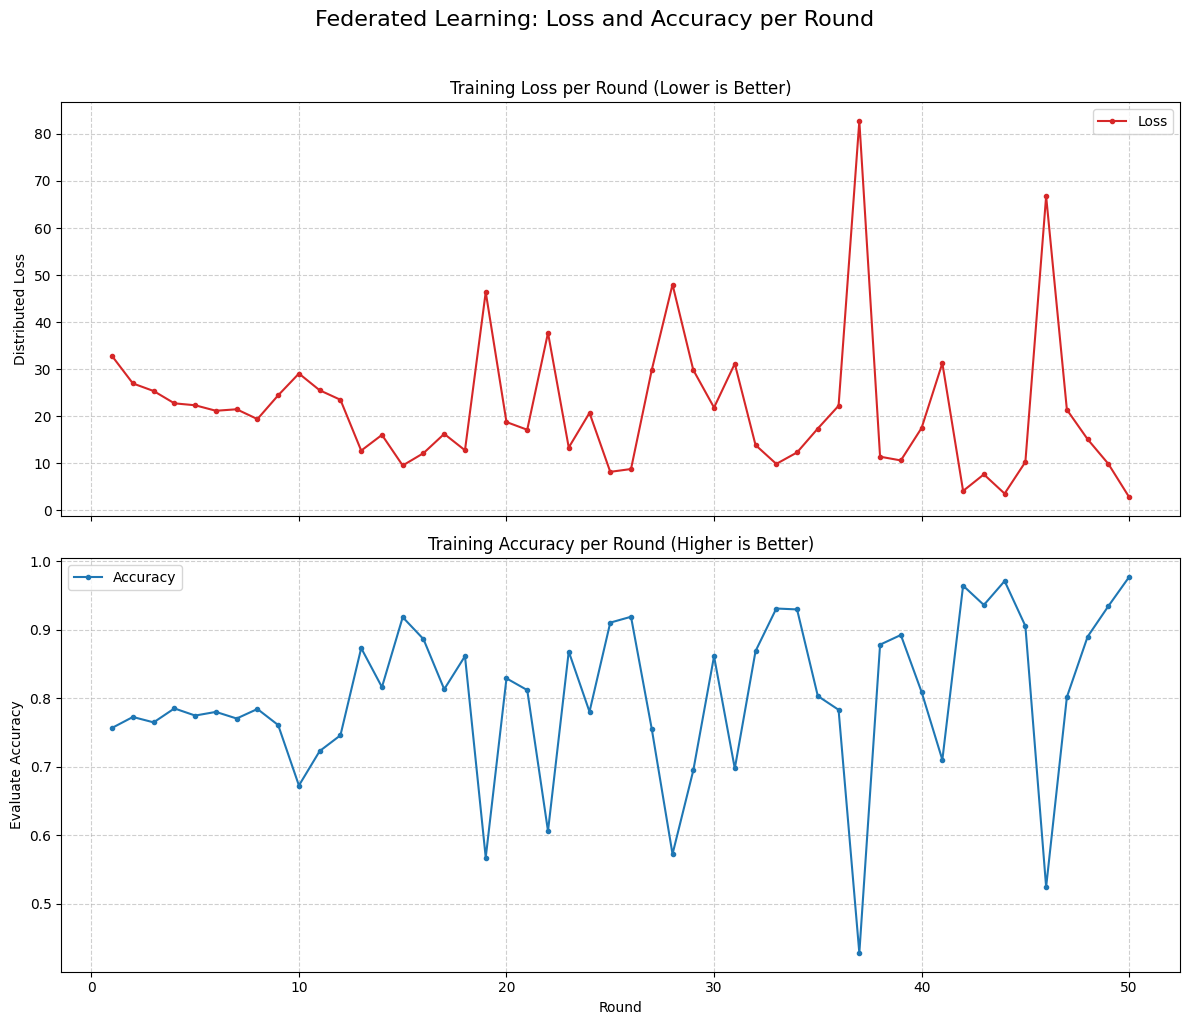

In [2]:
import matplotlib.pyplot as plt

# Data extracted from your log output (50 rounds)
rounds = list(range(1, 51))

# History (loss, distributed)
losses = [
    32.79807421898542, 26.99316122019687, 25.382876242458327, 22.764353501548044, 22.35337790029427,
    21.18602739649243, 21.50111961520802, 19.41790279136541, 24.468820684443575, 29.09397715570758,
    25.54059906967293, 23.5170509036637, 12.719617301546048, 16.05861203275949, 9.557487651863177,
    12.177235920148537, 16.270750606370072, 12.79249394071091, 46.40283173753383, 18.78695842149165,
    17.15403048211659, 37.74920459945604, 13.376968897023287, 20.74329828031449, 8.207425666271504,
    8.809151365217378, 29.86852376797917, 48.00946867829337, 29.853237108718808, 21.86473293827702,
    31.19041548665201, 13.892753427274645, 9.89441524308176, 12.334165203438419, 17.411221879586925,
    22.241437556240037, 82.71869520463692, 11.429372689139356, 10.634076853661469, 17.53004562232669,
    31.30129818429031, 4.152851761979699, 7.669481953301625, 3.5884458224995925, 10.309492608183467,
    66.77321955782506, 21.411422859364535, 15.130122366484065, 9.889194886034291, 2.837301664016759
]

# History (metrics, distributed, evaluate) - 'accuracy'
accuracies = [
    0.7567671782216395, 0.7726536592889643, 0.7647875375954346, 0.7851469113904527, 0.7747358679725457,
    0.7800570679416982, 0.7704172129251176, 0.7842986041489936, 0.7608544767486697, 0.6726305236369245,
    0.7229120074034087, 0.7458934217629367, 0.8732166268219326, 0.8162258039639084, 0.9183311482995296,
    0.8863268296444822, 0.8131410503586026, 0.861417444281638, 0.5674404256959975, 0.8290275314259273,
    0.8119071489164803, 0.606154083442585, 0.8682039022133107, 0.7802884244620961, 0.9103879077658672,
    0.9189480990205907, 0.755147682578854, 0.572530269144752, 0.6946093930747281, 0.8612632066013727,
    0.6975399089997687, 0.8688208529343718, 0.9309786380812832, 0.9296676177990283, 0.8032698388216242,
    0.783141821547004, 0.42824091925657437, 0.8782293514305545, 0.8923420991748284, 0.8091308706717051,
    0.7101102799413896, 0.9643710958587183, 0.9361456003701705, 0.9710804349502583, 0.9054523019973779,
    0.5244852317421146, 0.8017274620189713, 0.8899514151307164, 0.934526104727385, 0.9770957044806046
]

# Create a figure with two subplots, one on top of the other
# sharex=True will make them share the same x-axis (Rounds)
fig, (ax_loss, ax_acc) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)


# --- Plot 1: Loss ---
ax_loss.plot(rounds, losses, marker='.', color='tab:red', label='Loss')
ax_loss.set_ylabel('Distributed Loss')
ax_loss.set_title('Training Loss per Round (Lower is Better)')
ax_loss.grid(True, linestyle='--', alpha=0.6)
ax_loss.legend()

# --- Plot 2: Accuracy ---
ax_acc.plot(rounds, accuracies, marker='.', color='tab:blue', label='Accuracy')
ax_acc.set_xlabel('Round')
ax_acc.set_ylabel('Evaluate Accuracy')
ax_acc.set_title('Training Accuracy per Round (Higher is Better)')
ax_acc.grid(True, linestyle='--', alpha=0.6)
ax_acc.legend()

# Add a main title for the whole figure
fig.suptitle('Federated Learning: Loss and Accuracy per Round', fontsize=16, y=1.02)

# Improve layout
plt.tight_layout()

# Display the figure
plt.show()